In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
os.chdir(os.getenv("PROJECT_ROOT"))

In [9]:
import numpy as np

from patrec.utils import plot_series
from patrec.utils.files_helper import JSON_Handler, YAML_Config
from patrec.utils.mlflow_exp import MLflow_Experiment_Logger
import mlflow

In [3]:
filepath_1 = 'data/HAR_bench/sample_2/X_test.npy'
data_1 = np.load(filepath_1)
row_1 = data_1[0,:,:]
row_1.shape

(128, 9)

In [4]:
def subseq_generator(data, window_size, stride=1):
    """
    Generate subsequences as a generator (memory efficient for large data).
    
    Args:
        data: list or 1D array of time-series data
        window_size: length of each subsequence
        stride: step size between windows
    
    Yields:
        One subsequence at a time
    """
    for i in range(0, len(data)-window_size+1, stride):
        yield data[i:i+window_size]
        
windows_d = [5,7,10,12]
windows_h = [int(row_1.shape[0]*pct) for pct in [0.1, 0.2, 0.25, 0.5]]

json_file = {'d':{}, 'h':{}}

for window in windows_d:
    json_file['d'][window] = [sub for sub in subseq_generator(row_1[:,0], window)]

for window in windows_h:
    json_file['h'][window] = [sub for sub in subseq_generator(row_1[:,0], window)]

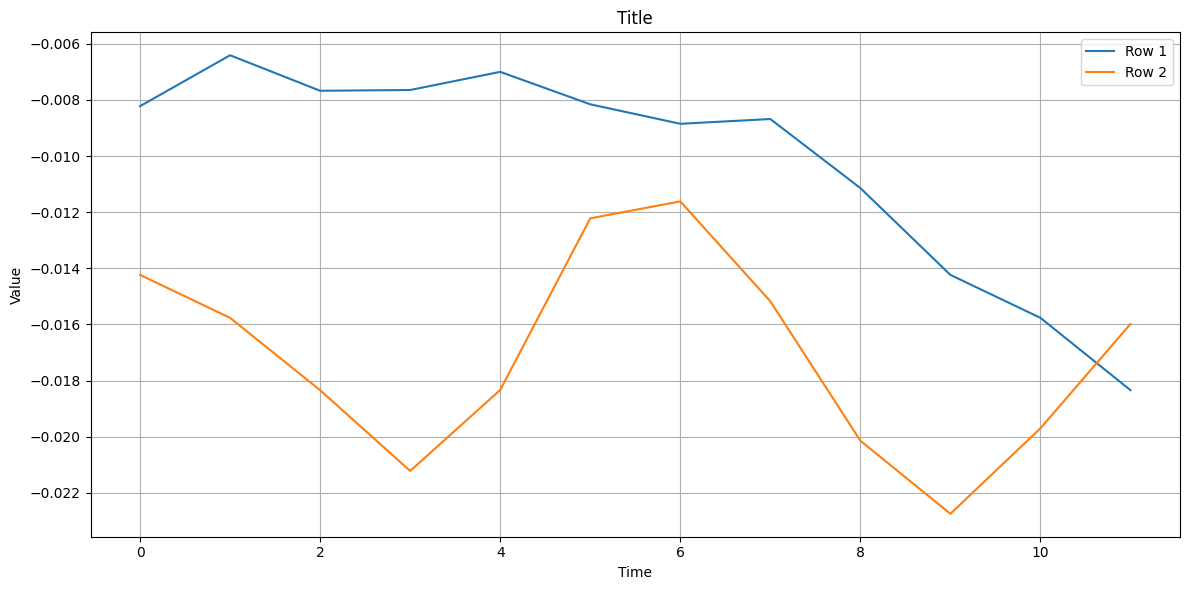

In [5]:
# len(json_file['d'][5])
plot_series([json_file['d'][12][1], json_file['d'][12][10]])

In [6]:
JSON_Handler('patrec/0_dummy_scripts/intervals.json', json_file, 'write')
# JSON_Handler('patrec/0_dummy_scripts/', json_file, 'write')
file = JSON_Handler('patrec/0_dummy_scripts/intervals.json', autoload=True)
file.data

{'d': {'5': [[-0.0129752,
    -0.008224412,
    -0.006411164,
    -0.007676127,
    -0.0076485],
   [-0.008224412, -0.006411164, -0.007676127, -0.0076485, -0.007002991],
   [-0.006411164, -0.007676127, -0.0076485, -0.007002991, -0.008157678],
   [-0.007676127, -0.0076485, -0.007002991, -0.008157678, -0.008851877],
   [-0.0076485, -0.007002991, -0.008157678, -0.008851877, -0.008682272],
   [-0.007002991, -0.008157678, -0.008851877, -0.008682272, -0.01114148],
   [-0.008157678, -0.008851877, -0.008682272, -0.01114148, -0.01423377],
   [-0.008851877, -0.008682272, -0.01114148, -0.01423377, -0.01576421],
   [-0.008682272, -0.01114148, -0.01423377, -0.01576421, -0.01834075],
   [-0.01114148, -0.01423377, -0.01576421, -0.01834075, -0.02121641],
   [-0.01423377, -0.01576421, -0.01834075, -0.02121641, -0.01833241],
   [-0.01576421, -0.01834075, -0.02121641, -0.01833241, -0.01221934],
   [-0.01834075, -0.02121641, -0.01833241, -0.01221934, -0.01161624],
   [-0.02121641, -0.01833241, -0.01221934

In [7]:
windows_config = {'d':windows_d, 'h':windows_h}
YAML_Config('patrec/0_dummy_scripts/interval_measure.yaml', windows_config)
config_1 = YAML_Config('patrec/0_dummy_scripts/interval_measure.yaml')
config_1.data

{'d': [5, 7, 10, 12], 'h': [12, 25, 32, 64]}

In [ ]:
# mlflow server --backend-store-uri ".backend" --default-artifact-root ".artifacts" --host localhost --port 5000

In [13]:
logger = MLflow_Experiment_Logger(experiment_name='check1')

🏃 View run brawny-crab-363 at: http://localhost:5000/#/experiments/382554899969964656/runs/e6e8de0486c74281a1049b4b3d9a4433
🧪 View experiment at: http://localhost:5000/#/experiments/382554899969964656


In [14]:
# From files (automatic format detection)
logger.log_parameters(".temp/Pelt_sub_sample2/results/params.yaml")  # Uses YAML_Config
logger.log_metrics(".temp/Pelt_sub_sample2/results/metrics.json")  # Uses JSON_Handler
logger.log_plots(".temp/Pelt_sub_sample2/results/plots/") 
# logger.log_estimator_params("model/params.json")

# From Python objects
# logger.log_parameters({"learning_rate": 0.01})
# logger.log_metrics({"accuracy": 0.95})

# Dataset handling
# logger.log_dataset("data/timeseries.json")  # Logs file and parses content
# logger.log_dataset({"samples": 1000, "features": 10})  # Direct dict input

# del logger
mlflow.end_run()

🏃 View run gaudy-kite-295 at: http://localhost:5000/#/experiments/382554899969964656/runs/3e2ece9fa1ae42088c0b02d56587cf8a
🧪 View experiment at: http://localhost:5000/#/experiments/382554899969964656
